In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [2]:
data = pd.read_csv('../data/output/Out_20.csv')
data

,\n0,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,rul,rul_diff,group
0,2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968,-827.558889,NaN,0
1,2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728,-827.511944,0.046944,0
2,2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845,-827.428611,0.083333,0
3,2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760,-827.345278,0.083333,0
4,2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815,-827.261944,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459,-7.540000,0.166667,10
2152,2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247,-0.443056,7.096944,10
2153,2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123,-0.333333,0.109722,10
2154,2003-11-25 23:29:56,0.017667,0.012698,0.026720,0.022581,0.233998,0.215641,0.036969,0.029343,-0.166667,0.166667,10


In [3]:
data_x = data[['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7', 'b4_ch8']]
data_x

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968
1,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728
2,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845
3,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760
4,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815
...,...,...,...,...,...,...,...,...
2151,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459
2152,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247
2153,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123
2154,0.017667,0.012698,0.026720,0.022581,0.233998,0.215641,0.036969,0.029343


<AxesSubplot:>

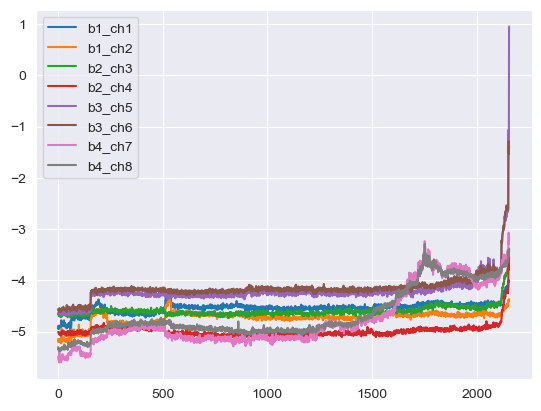

In [4]:
from sklearn.preprocessing import FunctionTransformer

function_tran = FunctionTransformer(func=lambda x: np.log(x), validate=False)

data_x_log = function_tran.transform(data_x)
data_x_log.plot()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA

scaler = MinMaxScaler()

x_dataset = pd.DataFrame(scaler.fit_transform(data_x_log), index=data_x_log.index, columns=data_x_log.columns)

<AxesSubplot:>

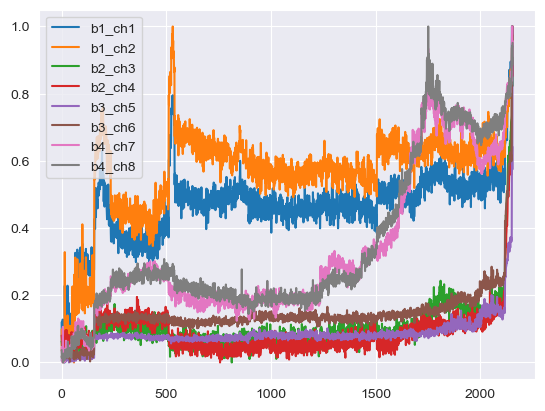

In [6]:
x_dataset.plot()

In [59]:
pca = KernelPCA(n_components=4, kernel='linear', gamma=100)
x_dataset_pca = pd.DataFrame(pca.fit_transform(x_dataset))
x_dataset_pca.plot()

TypeError: __init__() got an unexpected keyword argument 'whiten'

In [8]:
x_dataset_pca

,0,1,2,3
0,-0.604297,-0.402645,0.088451,0.013294
1,-0.661583,-0.470980,0.100842,0.035953
2,-0.646810,-0.447221,0.090714,0.012025
3,-0.659091,-0.462865,0.090454,0.028971
4,-0.659818,-0.420878,0.066636,0.019720
...,...,...,...,...
2151,1.084481,0.225559,0.692513,-0.091082
2152,1.369846,0.398113,1.078403,0.032049
2153,1.444424,0.380516,1.189274,0.046499
2154,1.305955,0.419999,1.045057,0.074624


In [9]:
train_data = x_dataset_pca.to_numpy()
train_data

array([[-0.60429736, -0.40264498,  0.08845108,  0.01329406],
       [-0.66158283, -0.47097994,  0.1008421 ,  0.03595317],
       [-0.64680962, -0.4472208 ,  0.09071397,  0.01202486],
       ...,
       [ 1.44442384,  0.38051623,  1.18927351,  0.04649935],
       [ 1.3059552 ,  0.41999875,  1.04505664,  0.07462362],
       [ 1.47328377,  0.41895565,  1.3627661 ,  0.14656274]])

In [10]:
train_data[1]

array([-0.66158283, -0.47097994,  0.1008421 ,  0.03595317])

In [11]:
def get_batch(train_x, train_y, time_step):
    length = len(train_x) - time_step
    sequence = []
    reserve = []

    for i in range(length):
        sequence.append(train_x[i:i + time_step])
        reserve.append(train_y[i:i + time_step])

    return np.array(sequence), np.array(reserve)
    pass

In [12]:
train_data_x, train_data_y = get_batch(train_data[:-72], train_data[72:][:, 0:4+1], 144)

In [13]:
train_data_y.shape

(1940, 144, 4)

# LSTM网络构建

In [14]:
torch.cuda.is_available()

True

In [15]:
import torch.nn as nn

class mutipleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(mutipleLSTM, self).__init__()

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
        self.linear = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x):
        lstm_output, _ = self.lstm(x)
        output = self.linear(lstm_output)
        return output
    pass

In [16]:
import seaborn as sns

In [17]:
model = mutipleLSTM(input_size=4, output_size=4, num_layers=3, hidden_size=256, dropout=0.5)

In [18]:
print(model)

mutipleLSTM(
  (lstm): LSTM(4, 256, num_layers=3, dropout=0.5)
  (linear): Linear(in_features=256, out_features=4, bias=True)
)


In [19]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [33]:
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    pass

In [20]:
train_data_x = torch.tensor(train_data_x).cuda()
train_data_y = torch.tensor(train_data_y).cuda()
train_data_x.float()
train_data_y.float()

tensor([[[-0.4955, -0.2706,  0.0701, -0.0707],
         [-0.5092, -0.2791,  0.0424, -0.0498],
         [-0.5039, -0.3201,  0.0513, -0.0735],
         ...,
         [-0.1392,  0.1739,  0.0601,  0.0060],
         [-0.1325,  0.1614,  0.0616,  0.0190],
         [-0.1448,  0.1284,  0.0744,  0.0056]],

        [[-0.5092, -0.2791,  0.0424, -0.0498],
         [-0.5039, -0.3201,  0.0513, -0.0735],
         [-0.4431, -0.1580,  0.0407, -0.0724],
         ...,
         [-0.1325,  0.1614,  0.0616,  0.0190],
         [-0.1448,  0.1284,  0.0744,  0.0056],
         [-0.2068,  0.0923,  0.0234,  0.0156]],

        [[-0.5039, -0.3201,  0.0513, -0.0735],
         [-0.4431, -0.1580,  0.0407, -0.0724],
         [-0.5165, -0.3097,  0.0439, -0.0365],
         ...,
         [-0.1448,  0.1284,  0.0744,  0.0056],
         [-0.2068,  0.0923,  0.0234,  0.0156],
         [-0.1974,  0.0439,  0.0318,  0.0164]],

        ...,

        [[ 0.4574,  0.0057, -0.0399,  0.0437],
         [ 0.4314,  0.0035, -0.0128,  0.0497]

In [21]:
train_data_x = train_data_x.float()
train_data_y = train_data_y.float()

In [28]:
epoch = 10
total_train_step = 0

for i in range(epoch):
    print('EPOCH:{}'.format(i + 1))

    for data in train_data_x:
        output = model(data)
        loss = criterion(output, train_data_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_step += 1
        pass
    pass

EPOCH:1


E:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2048, 72, 4])) that is different to the input size (torch.Size([72, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


EPOCH:2
EPOCH:3
EPOCH:4
EPOCH:5
EPOCH:6
EPOCH:7
EPOCH:8
EPOCH:9
EPOCH:10


In [29]:
print(model)

mutipleLSTM(
  (lstm): LSTM(4, 128, num_layers=3, dropout=0.1)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
)


In [72]:
type(train_data_x)

torch.Tensor

In [24]:
def train(model=nn.Module, dataloader=torch.utils.data.DataLoader, test_dataloader=None, epochs=int):

    loss_fn = nn.MSELoss(reduction='sum')
    optimizer_fn = optim.Adam(params=model.parameters(), lr=1e-3)

    if torch.cuda.is_available():
        loss_fn = loss_fn.cuda()
        model = model.cuda()

    train_hist = np.zeros(epochs)
    test_hist = np.zeros(epochs)

    for i in range(epochs):

        for train_data, train_label in dataloader:

            pre = model(train_data)
            tr_loss = loss_fn(pre.float(), train_label)
            tr_loss.requires_grad_(True)

            if test_dataloader is not None:
                with torch.no_grad():
                    for test_data, test_label in test_dataloader:
                        pre_test = model(test_data)
                        test_loss = loss_fn(pre_test.float(), test_label)
                        pass
                test_hist[i] = test_loss.item()
                if i % 10 == 0:
                    print(f'Epoch {i} train loss: {tr_loss.item()} test loss: {test_loss.item()}')
                    pass
                pass

            elif i % 10 == 0:
                print(f'Epoch {i} train loss: {tr_loss.item()}')
                pass

            train_hist[i] = tr_loss.item()
            optimizer_fn.zero_grad()
            tr_loss.backward()
            optimizer_fn.step()
            pass

        pass

        pass

    return model.eval(), train_hist, test_hist

    pass

In [28]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 128

data_set = TensorDataset(train_data_x, train_data_y)

In [35]:
dataloader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=data_set, batch_size=64, shuffle=True)

In [36]:
model = mutipleLSTM(input_size=4, output_size=4, hidden_size=512, dropout=0.1, num_layers=4)

model.train()

model_evl, t_h, te_h = train(model=model, dataloader=dataloader, test_dataloader=test_dataloader, epochs=100)

Epoch 0 train loss: 1973.9156494140625 test loss: 314.5438232421875
Epoch 0 train loss: 1924.472900390625 test loss: 330.3571472167969
Epoch 0 train loss: 2155.57666015625 test loss: 397.58538818359375
Epoch 0 train loss: 1779.5074462890625 test loss: 293.3303527832031
Epoch 0 train loss: 1929.401123046875 test loss: 470.9638671875
Epoch 0 train loss: 1895.25732421875 test loss: 227.32229614257812
Epoch 0 train loss: 1845.444091796875 test loss: 329.96636962890625
Epoch 0 train loss: 1985.44921875 test loss: 308.5814208984375
Epoch 0 train loss: 2032.0029296875 test loss: 388.2799072265625
Epoch 0 train loss: 2145.303955078125 test loss: 243.0955047607422
Epoch 0 train loss: 2073.815673828125 test loss: 229.51788330078125
Epoch 0 train loss: 1741.162109375 test loss: 273.82635498046875
Epoch 0 train loss: 1995.18896484375 test loss: 351.477294921875
Epoch 0 train loss: 2093.837158203125 test loss: 297.7177429199219
Epoch 0 train loss: 1901.151611328125 test loss: 231.54318237304688
Epo

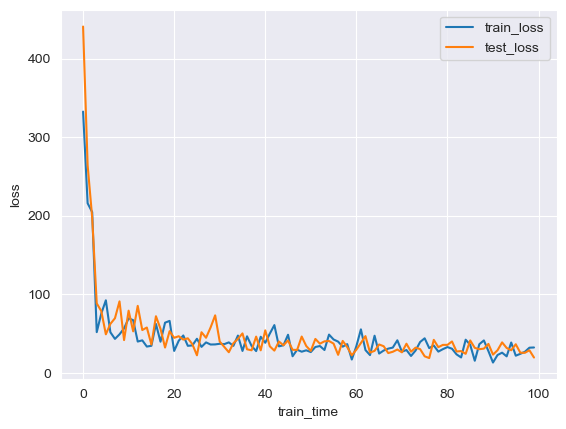

In [41]:
plt.figure(1)
plt.plot(t_h, label='train_loss')
plt.plot(te_h, label='test_loss')
plt.ylabel('loss')
plt.xlabel('train_time')
plt.legend()


In [42]:
y_out = model(train_data_x)

In [57]:
y_out = y_out.cpu()

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [55]:
y_out = y_out.detach().numpy()

In [56]:
y_out.shape

(1940, 144, 4)

In [58]:
y_pre = pca.inverse_transform(y_out[1, :, :])
y_pre

NotFittedError: The fit_inverse_transform parameter was not set to True when instantiating and hence the inverse transform is not available.

In [61]:
y_p = []
y_t = []

for i in range(y_out.shape[0]):
    y_m = np.mean(y_out[i, :, :], axis=0)
    y_p.append(y_m)

    y_true = np.mean(train_data_y.cpu().detach().numpy()[i, :, :], axis=0)
    y_t.append(y_true)


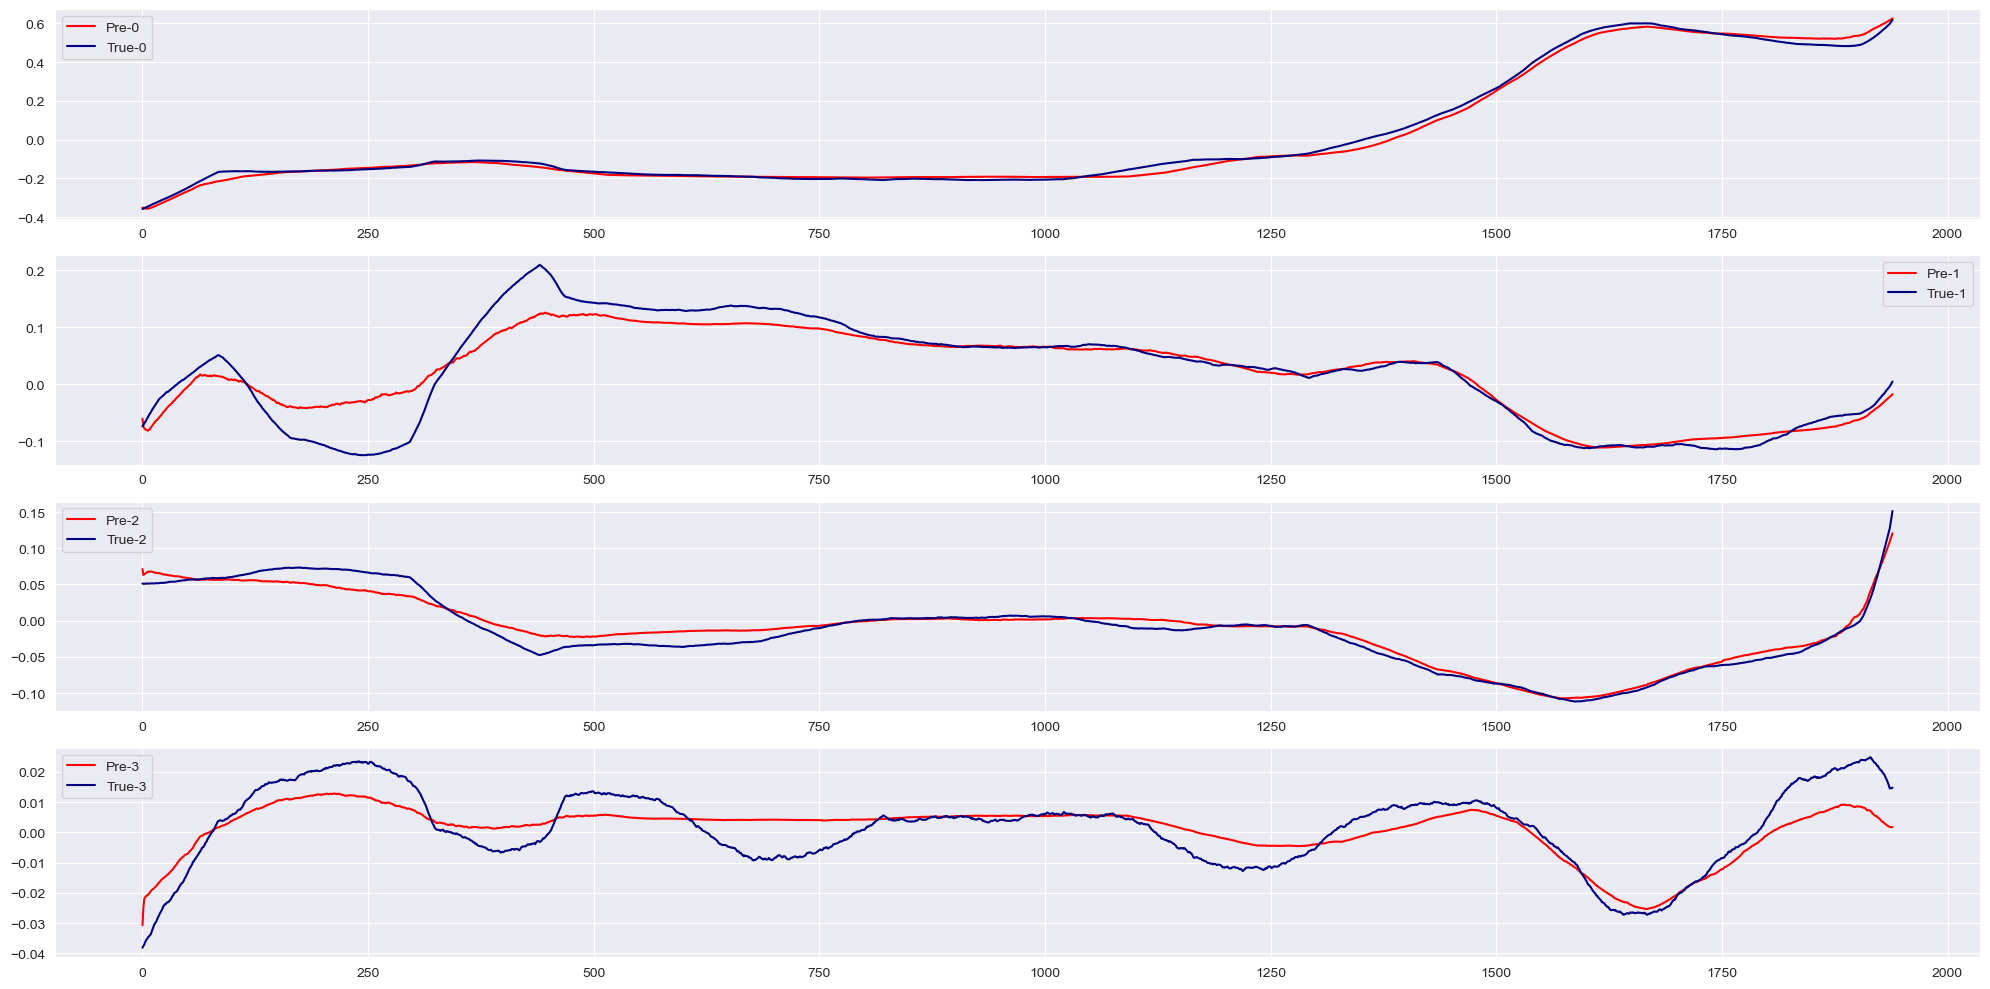

In [63]:
y_pre = np.array(y_p).reshape(-1, 4)
y_true = np.array(y_t).reshape(-1, 4)

plt.figure(figsize=(20, 10))

for i, index in enumerate(x_dataset_pca.columns):
    ax1 = plt.subplot(4, 1, i+1)
    plt.sca(ax1)
    plt.plot(y_pre[:, i], label="Pre-"+str(index), c='red')
    plt.plot(y_true[:, i], label="True-"+str(index), c='navy')
    plt.legend()
plt.tight_layout()
plt.show()

In [64]:
torch.save(model, '../models/lstm.pth')